In [176]:
import pandas as pd

In [177]:
df = pd.read_csv("ai4i2020.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
from xgboost import XGBClassifier
# Encode 'Type' column
# le = LabelEncoder()
# df['Type'] = le.fit_transform(df['Type'])

In [179]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[["Type"]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["Type"]))
df = pd.concat([df, encoded_df], axis=1)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.0,0.0,1.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.0,1.0,0.0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.0,1.0,0.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.0,1.0,0.0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.0,1.0,0.0


In [180]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.0,0.0,1.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.0,1.0,0.0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.0,1.0,0.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.0,1.0,0.0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.0,1.0,0.0


In [181]:
x = df.drop(["Product ID", "TWF", "HDF", "PWF", "OSF", "RNF", "Machine failure" , "Type", "UDI"], axis=1)


In [182]:
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0.0,0.0,1.0
9996,298.9,308.4,1632,31.8,17,1.0,0.0,0.0
9997,299.0,308.6,1645,33.4,22,0.0,0.0,1.0
9998,299.0,308.7,1408,48.5,25,1.0,0.0,0.0


In [183]:
y = df["Machine failure"]

In [184]:
scaler.fit(x)
x = scaler.transform(x)

In [185]:
x.max()

np.float64(7.514839837762832)

In [186]:
count_positive = y.sum()
count_negative = len(y) - count_positive

weight =  count_negative / count_positive

In [187]:
weight

np.float64(28.49852507374631)

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, stratify=y, random_state=42
)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [190]:
X_train

array([[ 1.64740431,  0.93986491,  0.85468575, ...,  2.99501081,
        -1.22474487, -0.65418609],
       [ 0.69747967,  0.67026137, -0.29438606, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [ 1.14744397,  0.93986491, -0.33343219, ..., -0.33388861,
        -1.22474487,  1.52861702],
       ...,
       [ 0.49749553,  0.46805871,  1.0499164 , ..., -0.33388861,
         0.81649658, -0.65418609],
       [ 1.3474281 ,  0.73766225, -0.55097491, ..., -0.33388861,
         0.81649658, -0.65418609],
       [-0.65241324, -0.20595015, -0.42825851, ..., -0.33388861,
         0.81649658, -0.65418609]])

In [191]:
model = XGBClassifier(scale_pos_weight=weight, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [192]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


 Accuracy: 98.73%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1449
           1       0.78      0.88      0.83        51

    accuracy                           0.99      1500
   macro avg       0.89      0.94      0.91      1500
weighted avg       0.99      0.99      0.99      1500



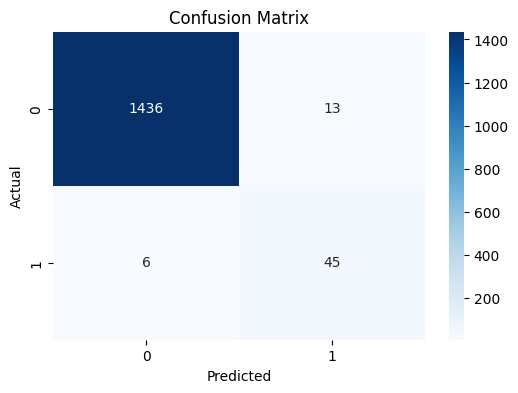

In [193]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy and Report
print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [194]:
y_prob = model.predict_proba(X_test)[:, 1]

In [207]:
model.predict_proba(scaler.transform( [[298.5,	308.6, 1522,	36.9, 53, 0 , 1, 0]]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[9.9991167e-01, 8.8323803e-05]], dtype=float32)

In [198]:
import joblib

In [199]:
joblib.dump(model, "uci-model-13-4.joblib")

['uci-model-13-4.joblib']

In [200]:
joblib.dump(scaler, "uci-scaler-13-4.joblib")

['uci-scaler-13-4.joblib']

In [214]:
import csv
# read csv file to a list of dictionaries
with open('ai4i2020.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        print(row)

{'\ufeffUDI': '1', 'Product ID': 'M14860', 'Type': 'M', 'Air temperature [K]': '298.1', 'Process temperature [K]': '308.6', 'Rotational speed [rpm]': '1551', 'Torque [Nm]': '42.8', 'Tool wear [min]': '0', 'Machine failure': '0', 'TWF': '0', 'HDF': '0', 'PWF': '0', 'OSF': '0', 'RNF': '0'}
{'\ufeffUDI': '2', 'Product ID': 'L47181', 'Type': 'L', 'Air temperature [K]': '298.2', 'Process temperature [K]': '308.7', 'Rotational speed [rpm]': '1408', 'Torque [Nm]': '46.3', 'Tool wear [min]': '3', 'Machine failure': '0', 'TWF': '0', 'HDF': '0', 'PWF': '0', 'OSF': '0', 'RNF': '0'}
{'\ufeffUDI': '3', 'Product ID': 'L47182', 'Type': 'L', 'Air temperature [K]': '298.1', 'Process temperature [K]': '308.5', 'Rotational speed [rpm]': '1498', 'Torque [Nm]': '49.4', 'Tool wear [min]': '5', 'Machine failure': '0', 'TWF': '0', 'HDF': '0', 'PWF': '0', 'OSF': '0', 'RNF': '0'}
{'\ufeffUDI': '4', 'Product ID': 'L47183', 'Type': 'L', 'Air temperature [K]': '298.2', 'Process temperature [K]': '308.6', 'Rotation